In [83]:
import pandas as pd
import matplotlib.pyplot as plt


In [84]:
df = pd.read_csv("/content/fish.csv")

In [85]:
df.head(5)


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [86]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(df['Species'])
df['Species_transformed'] = LabelEncoder().fit_transform(df['Species'])

In [87]:
df

,Species,Weight,Length,Diagonal,Height,Width,Species_transformed
0,Bream,242.0,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,29.0,34.0,12.4440,5.1340,0
...,...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936,5
155,Smelt,13.4,12.4,13.5,2.4300,1.2690,5
156,Smelt,12.2,13.0,13.8,2.2770,1.2558,5
157,Smelt,19.7,14.3,15.2,2.8728,2.0672,5


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              159 non-null    object 
 1   Weight               159 non-null    float64
 2   Length               159 non-null    float64
 3   Diagonal             159 non-null    float64
 4   Height               159 non-null    float64
 5   Width                159 non-null    float64
 6   Species_transformed  159 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


<ipython-input-89-534f4f3c80b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

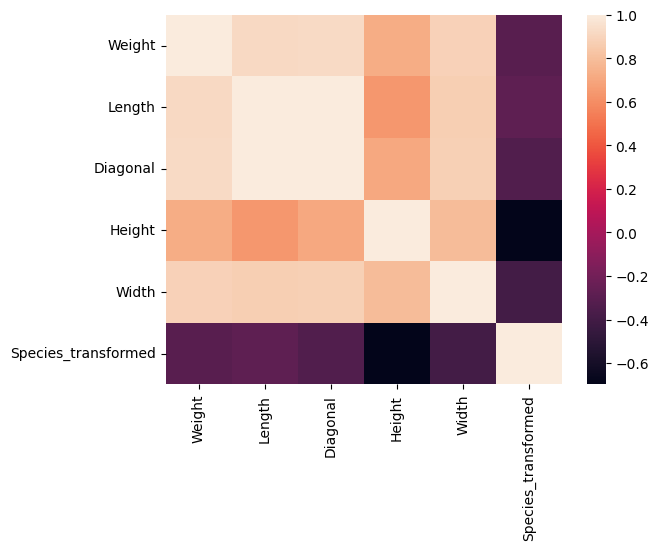

In [89]:
import seaborn as sns
sns.heatmap(df.corr())

In [90]:
x = df[['Weight','Length','Diagonal','Width']]

In [91]:
x.head()

,Weight,Length,Diagonal,Width
0,242.0,25.4,30.0,4.0200
1,290.0,26.3,31.2,4.3056
2,340.0,26.5,31.1,4.6961
3,363.0,29.0,33.5,4.4555
4,430.0,29.0,34.0,5.1340


In [92]:
y = df[['Species_transformed']]
y.head()

,Species_transformed
0,0
1,0
2,0
3,0
4,0


 Decision Tree

In [93]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=42, test_size =0.1 )

In [94]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [95]:
model.score(xtest, ytest)

0.6875

In [96]:
x = model.predict([[255.2,29.5,40.3,4.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [97]:
lb.inverse_transform(x)

array(['Pike'], dtype=object)

In [98]:
lb.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [99]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain.values)


<ipython-input-99-cf8e58d20af6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain.values)


RandomForestClassifier()

In [100]:
model.score(xtest, ytest)

0.6875

In [101]:
x = model.predict([[255.2,29.5,40.3,4.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [102]:
lb.inverse_transform(x)

array(['Bream'], dtype=object)

In [103]:
lb.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)